### Overview
Metrics for evaluating the retrieved products (context)
- BLEU and ROUGE score: both scores are based word match
- Context relevance: Ask an LLM to give a score of how relevant the retrieved products are

Metrics for evaluating the price range
- MAPE
- Visualization

In [3]:
import evaluate
import os

c:\Users\trung\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Each function takes an argument called ```dataset```, which is a dictionary with the form
```
{
    "test_descriptions": <list of descriptions of original products>
    "test_prices": <list of prices of each of the original products>
    "contexts": <List of List: Each inner list is the list of retrieved products from the database or by the agent>
    "responses": <List of List: Each inner list is price range predicted>
}
```

For example,
```
dataset = {
    "test_descriptions": ["shirt", "shoes"]
    "test_prices": [20, 100]
    "contexts": [["shirt1", "shirt2"], ["shoes1", "shoes2"]]
    "responses": [[15, 25], [90, 105]]
}
```

Below is two datasets I built from 50 original products, the difference between them is in the retrieved products (context)
- ```rag_dataset```: the context is 5 products retrieved from the database
- ```filter_rag_dataset```: I retrieved 20 products from the database, then prompt an LLM to only choose 5 products that are relevant to the original products

The assumption is that ```filter_rag_dataset``` should be better than ```rag_dataset```

In [4]:
rag_dataset = {'test_descriptions': ['Men\'s Retro 6"Hare Neutral Grey/Black-White (CT8529 062)',    'Womens T Shirts V Neck Basic Tee',    "Men's Sweatpants, EcoSmart Best Sweatpants for Men, Men's Athletic Lounge Pants with Cinched Cuffs (1 or 2 Pack Option)",    '19 Options - Maxi Numbers Watch, Silicone Band - Interchangeable Silicone Strap - Easy to Read Analog Face with Second Hand for Women, Men, Nurses, Teachers, Seniors, EMT Olivia',    "Women's Emslie Lulin Pump",    'Unisex Post Shoulder Surgery Shirts for Men Tearaway Recovery Long Sleeve Shirt Women Full Open Side Snap Adaptive Clothing',    'HAMILTON SMALL SATCHEL SHOULDER CROSSBODY BAG MK SIGNATURE',    'RFID Genuine Leather Trifold Badge Holder Wallet Black, Police Badge Holder',    'Lazer Face Z87 Sunglasses in Black',    'Sunglasses Tom Ford FT 0909 Samson 02D Matte Black/Polarized Smoke Lenses',    'Womens Loafers Designer Loafers Women Shoes Leather Women Driving Loafers',    'Mens 4-Pack Active Mesh Quick Dry Performance Boxer Brief',    'Women Snap Crotch Lingerie Sexy Lace Bodysuit Deep V Teddy One Piece Lace Babydoll',    'The Tote Bag for Women Large Leather Tote Bag Dupes Top Handle Crossbody Handbags',    "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 9.5",    'Voyageur Belle Micro Crossbody - Luxe Leather Crossbody for Women - Purse Crossbody - Black Leather & Gold Hardware',    'womens Running Shoes', "Women's Emery Quartz Watch",    "Moloa Men's Leather Slip On Shoes, Waxed Nubuck Leather & Soft Moisture-Wicking Lining, Drop-in Heel & All Weather Rubber Soles",    '4 Pairs Copper Compression Socks for Women & Men 15-20 mmHg,Best Support for Nurses Running Hiking',    "Men's Medfield Cap Toe Oxford",    'Men 5 Automatic 7S26 100M Sport SNXF05 SNXF05K1',    'Archive MiLB Minor League Baseball Team Cap Buckle Strap Dad Hat',    "Men's Ridgeback VentTEK Western Boot",    'Unisex Adult Analogue-Digital Quartz Watch with Stainless Steel Strap K7A23646',    "MTP-VD01D-2BV Men's Enticer Stainless Steel Blue Dial Casual Analog Sporty Watch",    "Men's Jungle Leather Slip-On Shoe",    'Bra-Llelujah!® Lightly Lined Full Coverage Bra',    'Vulcan Polarized Sunglasses, Matte Black/Graphite',    'Big Sport Blue 48mm Chronograph',    "Men's Green Dial Brown Leather Band Automatic Watch",    'Mens FreshIQ X-Temp Active Cool No-Show Socks 12-Pack',    'I Support Drinking During The Day - Vintage Retro Style Trucker Cap Hat',    'Acrylic Clutch Purses for Women with Marbling Purses and Handbags Elegant Banquet Evening Crossbody Bag',    'Womens Comfortable Loafers Floral Print Flats Casual Driving Loafer Slip on Walking Dress Shoes for Women',    'Silver Plated Bracelet Shining Bangle Bracelets (Silver)',    'Mens Short Sleeve Dress Shirts Regular Fit Casual Button Down Shirts',    'Water Shoes Men,Mens Water Shoes,Water Shoes for Women,Mens Womens Beach Shoes,Aqua Shoes,Swim Shoes,Pool Shoes,Barefoot Shoes,Water Shoes Quick Dry,Boating Fishing Diving with Yoga Water Aerobics',    "Men's Dune Slip-on Lta Slipper",    "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 9",    "Women's Athletic Walking Shoes - Casual Knit Lightweight Running Slip On Sneakers",    "Women's Bracelet Sterling Silver ref: 590719-20",    'Kigurumi Hat - My Melody - Cozy Costume Beanie Cap - Adult Size',    'Hat Stretcher for Fitted Hat Felt Stout Porkpie Hat Breaking Bad Flat Full Brim Fedoras Hats Crushable',    'Red, blue and white, by Piet Mondrian Unisex Watch (Model: SUOZ344)',    "Men's Day/Date Function Bracelet Watch, 20/4935",    'Watches Promaster Dive BN0155-08E Black One Size',    "Men's Kick Hi Core Classic Boots Ankle",    "Boys' 221 Compression Shorts",    "Men's T 8 Bifida Multi-Terrain Military Tactical Suede Leather Boots"], 'test_prices': [303.99,  19.99,  23.99,  36.  ,  51.38,  29.97, 163.45,  18.99,         60.  , 231.8 ,  40.99,  24.99,  17.99,  29.99,  75.  , 350.  ,        109.  , 135.  , 139.95,  14.99,  69.97, 169.99,  34.05, 199.95,         54.98,  35.99,  42.  ,  68.  , 101.11, 250.  , 409.99,  32.98,         16.99,  32.99,  25.82,   7.99,  21.99,  23.99, 109.95,  49.43,         22.49,  59.83,  25.99,  14.99, 110.  ,  30.5 , 225.  ,  83.11,         18.99, 170.  ], 'contexts': [['Mens Low Cut All Sport No Show Socks 6-Pair stock size 10-13 shoe size 6-12, White/Grey',   "Men's Climalite Low Cut Sock 6-pair (White - Gray)",   'Unisex Dri-FIT Cushion Crew Training Socks (6 Pair), BLACK/WHITE, OS',   'Men`s Ankle Socks, 186V12,12-Pack, 10-13, White (Shoe Size 6-12)',   'Dri-Fit Classic Cushioned Crew Socks (Large, Black/White/White)'],  ['Womens T Shirts V Neck Summer Short/Long Sleeve Cotton Tops Tees',   'Women Short Sleeve Deep V Neck Tops Shirts Fitted Cotton Summer Tshirt Tee',   "Women's Short-Sleeve V-Neck T-Shirt (Available in Plus Size)",   'Women Shirts V Neck Short/Long Sleeve Cotton Tops T-Shirt Basic Tees',   "Women's Short Sleeve V-Neck Shirts Loose Casual Tee T-Shirt"],  ["Men's Fleece Joggers Pants | Multi Pack | Athletic Loose-fit Sweatpants for Workout, Running, Training",   "Men's Lightweight Sweatpants Open Bottom Sweat Pants for Mens Straight Leg Jogger Sweatpants Lounge Pants with Pockets",   '3 Pack Mens Joggers Mens Athletic Sweatpants with Pockets for Men, Small - 5X',   "ComfortSoft EcoSmart Men's Fleece Sweatpants",   'Big & Tall Eversoft Fleece Elastic Bottom Sweatpants with Pockets, Relaxed Fit, Moisture Wicking,Breathable'],  ['19 Styles Mini Numbers Watch Silicone Band - Interchangeable Rubber Strap - Easy to Read Petite Small Size Analog Nurse Watch with Second Hand for Women, Men, Nurses, Teachers,',   'Nurse Watch for Medical Professionals, Students,Doctors, Women Men, 38mm Watch, Easy to Read Dial, Second Hand and 24 Hour,Soft and Breathable Silicone Band,Water Resistant',   'Petite Watch for Women Nurses Girls, Easy to Read Small Face, Silicone Band, Military Time Second Hand and 24 Hour, Waterproof',   '29 Styles Maxi Numbers Watch Leather Band - Interchangeable Genuine Leather Strap - Large Easy to Read Nurse Watch with Second Hand for Women, Men, Nurses, Teachers, Olivia',   'Womens Silicone Analog Quartz Wrist Watches Fashion Casual Colorful Sport Rubber Jelly Watch with Classic Arabic Numerals'],  ["Women's Yalina Pump",   "Women's Linvale Jerica Pump",   "Women's Gayle Pump",   "Women's Florencia Pump",   "Women's Kamilah Pump"],  ['Post Shoulder Surgery Shirts for Men Recovery Long Sleeve Shirt Women Full Open Side Snap Chemo Dialysis Adaptive Clothing',   "Men's Post Shoulder Surgery Shirts Recovery Tear Away Short Sleeve Full Open Side Snap Dialysis Chemo Clothing",   "Post Shoulder Surgery Shirt - Men's - Women's - Unisex Sizing",   'Sweatproof Undershirt for Men with Underarm Sweat Pads (Original Fit, V-Neck)',   'Long Sleeve Tee Shirts for Men Dry Fit Moisture Wicking Long Sleeve Shirts Sun Protection Workout Shirts for Running'],  ['HAMILTON SMALL SATCHEL SHOULDER CROSSBODY BAG MK SIGNATURE BROWN',   'Hamilton Medium Satchel Multi MK Signature Vegan Leather',   'Hamilton Medium Vanilla MK Signature Pink Satchel Crossbody Handbag',   'Charlotte Large 3-in-1 Tote Crossbody Handbag MK',   'Mirella Large Signature MK Tote Bag'],  ["Trifold Leather Wallet for Men with RFID Blocking，Men's Gifts (Black)",   'Tri fold black leather wallet | rich fabric | RFID blocking | 1 ID and 6 Credit card slots | Front pocket wallets for him',   'Mens Wallets Top Grain Genuine Leather Trifold Extra Capacity with Removable ID Wallet Insert, RFID Blocking Card Holder lightweight, Black',   'Mens Black Leather Wallet Lamb Classic Trifold 731',   "Men's RFID Blocking Premium Leather Chain Trifold Wallet (Black with Chain)"],  ["Men's 40/8252BLK Black Digital Chronograph Watch",   'ICE Forever Black - Wristwatch with Silicon Strap',   "Men's W59-1V Classic Black Digital Watch",   "Men's W213-1ACF Basic Black and Silver Digital Watch",   "XL.1052 Men's Ice-SAR Arctic Black Rubber Strap Watch"],  ['Sunglasses Tom Ford FT 0685 Julie 05E black/other/brown',   'Sunglasses Tom Ford FT 0524 Alistair 05B black/other / gradient smoke, Black and Ivory, 56-16-140',   'Eyeglasses Tom Ford FT 5838 -B 001 Shiny Black,"t" Logo/Blue Block Lenses',   'Eyeglasses Tom Ford FT 5713 -B 005 Matte Black/Blue Block Lenses',   'Sunglasses TOM FORD FT0906 Buckley-02 55E sunglasses Man color Havana brown lens size 56 mm'],  ['Womens Penny Loafers Shoe Women Leather Loafers Driving Moccasins Shoes Comfortable Boat Shoe',   "Loafers for Women Comfortable Pointed Toe Memory Foam Women's Loafers",   'Womens Penny Loafers Breathable Slip on Flat Shoes Moccasins',   'Loafers for Women Slip On Comfortable Round Toe Casual Fashion Flats Driving Shoes',   "Women's Flats I Square Toe Shoes for Women I Flat Shoes I Womens Flat Leather Shoes I Flat Shoes Women"],  ["Men's Active Underwear - Sport Soft Performance Boxer Briefs (4 Pack)",   "Men's Sport Performance Mesh Boxer Brief Underwear (3-Pack)",   'Men\'s Mesh 5" No Fly Boxer Brief (4 Pack)',   "Men's Underwear ActiveBlend Boxer Brief - 4 Pack",   "Men's Comfort Flex Fit Ultra Lightweight Mesh Boxer Briefs, 4-Pack"],  ['Women One Piece Lingerie Deep V Teddy Sexy Lace Bodysuit',   'Women One Piece Lingerie Sexy Lace Bodysuit Deep V Teddy Babydoll Nightgown XS-XXXL',   'Women Sexy Eyelash Lace bodysuit Snap Crotch Teddy Lingerie',   'Women Lace Bodysuit Deep V Neck Dobby Mesh Body Suits Teddy Lingerie',   "Women's Floral Lace One Piece Lingerie Mesh Babydoll Teddy Lingerie Bodysuit"],  ['The Tote Bags for Women - Leather Tote Bag Trendy Travel Tote Bag Handbag Top-Handle Shoulder Crossbody Bags',   'Womens Leather Purses and Handbags Top Handle Satchel Bags Tote Bags Tote Purses for Women',   'Leather Tote Handbags for Women, Ladies Large Top-handle Purse Shoulder Bags',   'Tote Bags for Women Top Handle Satchel Purses and Handbags',   'Purses and Handbags for Women Top Handle Satchel Shoulder Bags Ladies Leather Totes'],  ["Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 7.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 9",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 10.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 11.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 7"],  ['Small Crossbody Purse for Women, Vegan Leather Shoulder Handbags with Adjustable Strap & Credit Card Slots',   'Small Crossbody Bag For Women Trendy,Vegan Leather Hobo Handbag,Small Magnet Flap Zip Shoulder Bag Purse For Women',   'Crossbody Purse Handbag for Women Designer Vegan Leather Shoulder Zipper Bag with 2 Adjustable Straps',   'Crossbody Purse for Women Small Crossbody Bags Trendy Vegan Leather with Adjustable Shoulder Strap',   'Small Crossbody Bags for Women, Trendy Vegan Leather Shoulder Purses, Clutch Wallet with Wristlet Strap'],  ['womens Running Shoes',   'womens Running Shoes',   "Women's Running Shoes",   "Women's Running Shoes",   "Women's Running Shoes"],  ["Women's Quartz Watch",   "Women's Analogue Quartz Watch",   "Women's Modern Classic Watch",   "Women's Modern Classic Watch",   "Women's Modern Classic Watch"],  ["Moloa Men's Leather Slip On Shoes, Waxed Nubuck Leather & Soft Moisture-Wicking Lining, Drop-in Heel & All Weather Rubber Soles, Dk Wood/Dk Java, 11",   "Kalia Men's Leather Slip-On, Full-Grain Waxed Nubuck Leather Shoes, Lightweight & Comfortable",   "Kipuka Hulu Men's Leather Slippers, Premium Nubuck Leather Slip On Shoes, Shearling Lining & Gel Insert, Drop-In Heel Design",   "Kakaha Men's Slip-On Shoes, Full-Grain Leather Sneakers, Gel Insert for Comfort & Support, Comfort Fit & Wet Grip Rubber",   "Men's Moc Slippers with Memory Foam Insole Suede Sidewall and Rubber Outsole Moccasin"],  ['Copper Compression Socks for Women and Men(6 Pairs)-Best Support for Running, Athletic, Nursing, Travel',   'Copper Compression Socks for Women & Men (6 pairs) - Best Support for Nurses, Running, Hiking, Recovery',   '3 Pairs Copper Compression Socks for Women&Men Circulation 20-30mmHg-Best for Medical,Running,Athletic,Nursing',   'Copper Compression Socks Men Women Circulation 4 Pairs-Best Support for Nurses,Runningl,Cycling',   'Copper Compression Socks For Men & Women Circulation-Best For Running Hiking Cycling 15-20 mmHg'],  ["Men's, Midtown Cap Toe Oxford",   "Men's, Maddox Cap Toe Oxford",   "Men's Robinsyn Waterproof Cap Toe Oxford",   "Men's Citytray Cap Toe Tie Oxford",   "Men's Dickinson Cap-Toe Lace-up Oxford"],  ['5 Sports Automatic SRPE55K1',   "Men's Japanese Automatic Neo Classic Sports",   'Automatic Watch RA-AC0K04E10B',   'Automatic Watch RA-AC0K02E10B',   "Men's Analogue Automatic Watch 5 Sports"],  ['47 MLB Black White Clean Up Adjustable Hat Cap, Adult One Size',   'Nippon Japanese Professional League Baseball Dad Hat(44740A-NPL)',   'Chevrolet Officially Licensed Adjustable Baseball Hat',   'Coke Officially Licensed Adjustable Baseball Hat',   '42 Robinson Baseball Cap Day 50th Patch Dad Hat Snaback Sport Outdoors Hat'],  ["Men's Sport My Country Venttek Western Boot",   "Men's Booker Ultra Western Boot",   "Men's Brander Western Boot",   "Men's Point Ryder Western Boot",   "Men's Wilder Western Boot"],  ['Unisex-Adult Analogue Classic Automatic Watch with Stainless Steel Strap SYMK13K1',   'Unisex Analogue Quartz Watch with Stainless Steel Strap',   'Unisex Analogue Quartz Watch with Stainless Steel Strap',   'Unisex Analogue Quartz Watch with Stainless Steel Strap',   'Unisex Analogue Quartz Watch with Stainless Steel Strap'],  ["MTP-VD01D-2EV Men's Enticer Stainless Steel Blue Dial Casual Analog Sporty Watch",   "MTP-VD03D-2A Men's Standard Stanless Steel Blue Dial 3-Hand Analog Watch",   "MTP-V005D-2B4 Men's Standard Stainless Steel Blue Easy Reader Dial Analog Watch",   "MTP-V005D-2B5 Men's Standard Stainless Steel Blue Roman Dial Analog Watch",   "MTP-V006D-2B Men's Stainless Steel Easy Reader Blue Dial Day Date Analog Dress Watch"],  ["Men's Cassidy Slip-on",   "Men's Junction Point Slip-on",   "Men's Riva Slip-On",   "Men's Montz Devent Slip-On Loafer",   "Men's Charles Road Slip-On Loafer"],  ['Bra-Llelujah!® Unlined Bralette',   "Women's Lightly Lined Wire-Free Bra",   'Womens One Smooth U Underwire Bra, Smoothing & Concealing Full-Coverage Bra, Df3w11',   "Women's B.wow'd Wire Free Bra",   "Women's Full Figure Beauty Back Smoothing Bra (40B-42H)"],  ['Charlie Polarized Sunglasses - Matte Black',   'Unisex Sunglasses Black Matte Frame, Grey Lenses, 61MM',   'Clutch Sunglasses Matte Black with Wildlife Vintage Grey Polarized Lens',   'Unisex Sunglasses Shiny Black Frame, Polarized Dark Grey Lenses, 58MM',   'Man Sunglasses Black Frame, Dark Grey Lenses, 58MM'],  ["Men's Ocean Manta Chronograph Quartz Watch, Blue, TM-220002",   "Men's Sport Chronograph Quartz Silver Tone Stainless Steel Watch, Blue Dial Style: 43A145",   "Men's Classic Sport 6-Hand Chronograph Quartz Watch, Black Polyurethane Strap, Blue Accent Style: 98A211",   "Men's 25913 Reserve Quartz Chronograph Blue Dial Watch",   "Men's NST Chrono Blue Silicone Strap Watch (Model: NAPNSF201)"],  ["Men's Brown Dial Leather Band Automatic Watch",   "Men's H64455533 Khaki King Series Stainless Steel Automatic Watch with Brown Leather Band",   "Men's SU/5015NVBN Date Function Easy to Read Brown Leather Strap Watch",   "Men's 11028 Analog Display Analog Quartz Green Watch",   "Artist Automatic Men's Watch - 50.5mm. Green (40759)"],  ["Men's FreshIQ Cool Comfort Reinforced Ankle Socks, 12-Pair Pack",   "Men's FreshIQ X-Temp Active Cool Crew Socks 12-Pack",   "Men's FreshIQ X-Temp Active Cool Big and Tall Crew Socks 12-Pack",   "Hanes Men's FreshIQ X-Temp Active Cool No-Show Socks 12-Pack",   "Men's Socks, X-Temp Cushioned No Show Socks, 12-Pack"],  ['Trucker Hat May Contain Whiskey for Men Adjustable One Size Fits Most Mesh Cap Grey, Black',   "It's My Birthday Trucker Hat, Adjustable Mesh Baseball Cap, Outdoor Fishing Hat for Men and Women",   'Trucker Hat for Men or Women- Many Cool Designs',   "Men's Trucker Cap",   '50th Birthday Gifts for Men Women 1973 Hats Vintage 1973 Baseball Cap for 50 Year Old Woman Mens Gifts for Christmas'],  ['Acrylic Purses and Handbags with Marbling for Women Elegant Banquet Evening Crossbody Handbag Box Clutch',   'Women Acrylic Clutch Purse Marbled Evening Shoulder Bag for Wedding Cocktail Party Prom',   'Acrylic Purses Evening Clutch Bag Marbling Handbags for Women Cross Body Bag with Pearl Chain Formal Wedding Prom Party',   'Acrylic Evening Clutch Bag for Women Marble Handbag Pearl Clutch Purses for Formal Wedding Prom',   'Women Acrylic Evening Clutch bag Glitter Marble Purse Handbag for Wedding Cocktail Party Prom'],  ['Loafers for Women Slip On Comfortable Round Toe Casual Fashion Flats Driving Shoes',   'Loafers for Women Flats Shoes Women Pointed Toe Dress Shoes Comfortable Memory Foam Penny Loafers Slip On Shoes',   "Loafers for Women Casual Comfortable Women's Pumps Shoes Loafers & Slip-ons Work Office Dressy Business Shoes",   'Loafers for Women Dress Shoes Low Heel Slip On Shoes Casual Work Office Dressy Shoes',   'Floral Embroidered Shoes for Women Comfortable Round Toe Loafer Casual Ballet Flats'],  ['Jewelry Bangle Sterling Silver Bracelet',   'Jewelry Silver Open Bangle Sterling Silver Bracelet',   'Fashion Women Jewelry Solid 925 Sterling Bangle Bracelet Gift, Silver, (9inch)',   '925 Silver Trendy Bracelet, Fashion Jewelry Simple Cuff Bangles for Women Mom Wife Valentine Mothers day Gift',   'Ladies Silver Tone Bracelet'],  ['Mens Short Sleeve Dress Shirts Regular Fit Business Casual Button Down Shirt',   "Men's Casual Button Down Shirt Short Sleeve Cotton Dress Shirts",   'Mens Short Sleeve Dress Shirts Wrinkle Free Solid Casual Button Down Shirts with Pocket',   'Mens Casual Button Down Shirt Short Sleeve Wrinkle Free Shirts Summer Shirt',   'Mens Non Iron Dress Shirts Wrinkle Free Short Sleeve Button Up Shirts Business Casual Button Down Shirt'],  ['Water Shoes Men,Mens Water Shoes,Water Shoes for Women,Mens Womens Beach Shoes,Aqua Shoes,Swim Shoes,Pool Shoes,Barefoot Shoes,Water Shoes Quick Dry,Boating Fishing Diving with Yoga Water Aerobics',   'Water Shoes Men,Mens Water Shoes,Water Shoes Women,Barefoot Shoes,Quick Dry Aqua Swim Shoes,Slip-on Soft Beach Shoes,Quick Dry Water Shoes,Aqua Sports Outdoor Shoes for Pool Beach Surf Walk Water Yoga',   'Water Shoes Men,Mens Water Shoes,Water Shoes Women,Barefoot Shoes,Quick Dry Aqua Swim Shoes,Slip-on Soft Beach Shoes,Quick Dry Water Shoes,Aqua Sports Outdoor Shoes for Pool Beach Surf Walk Water Yoga',   'Water Shoes Men Water Shoes for Women Mens Water Shoes Beach Shoes for Mens Womens Aqua Swim Shoes Quick Dry Water Shoes Aqua Shoes for Pool Beach Boat Surf Walking Water Park Yoga',   'Mens Womens Water Shoes Aqua Shoes Swim Shoes Beach Sports Quick Dry Barefoot for Boating Fishing Diving Surfing with Drainage Driving Yoga Upstream'],  ["Men's Classic Slip-on Slipper",   "Men's Graisen Slipper",   "Men's Tipton Slipper",   "Men's Olsen Slipper",   "Men's Wherever Slipper"],  ["Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 9.5",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 14",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 8.5",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 11",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 12"],  ["Women's Slip on Walking Shoes, Lightweight Non Slip Sneakers with Removable Insole - Breathable Knit Mesh Upper - Casual Travel Work Jogging Tennis Shoe",   "Women's Athletic Walking Shoes Slip On Casual Mesh-Comfortable Tennis Workout Sneakers",   "Women's Walking Shoes, Slip on Tennis Shoes Women, Non Slip Shoes Sneakers, Casual Athletic Running Lightweight Breathable Mesh Knit",   'Walking Shoes Women Breathe Mesh Slip On Sneakers Women Comfortable Lightweight',   'Womens Walking Tennis Shoes - Slip On Memory Foam Lightweight Casual Sneakers for Gym Travel Work'],  ["Women's Bracelet Sterling Silver ref: 590719-18",   "Women's Bracelet Sterling Silver ref: 590719-19",   'Jewelry Bangle Sterling Silver Bracelet',   'Ladies Silver Tone Bracelet',   'Jewelry Reflexions Sterling Silver Bracelet'],  ['San-X Licensed Rilakkuma Animel Beanie Fluffy Beanie Cap Soft Warm Winter Head wear (Korilakkuma-Ivory)',   'My Melody Bag, Cinnamoroll Bag Cute Cartoon Shoulder Bag Anime Cosplay Doll Handbag',   'Sanrio My Melody and Kuromi Wallet, Bifold, Pink',   'Strawberry Shortcake Hat Bonnet for Women and Girls - Costume Cosplay Womens Halloween Costumes Berry Costume',   'Kirby Main Character Face Bucket Hat Pink'],  ['Classic Fashion Black Wide Brim Flat Top Fedora Panama Hat Felt Church Derby Cap Pork Pie Hat Jazz Hat',   'Fedora Hats for Men Women 100% Australian Wool Pork Pie Mens Fedora Hat with Short Brim Classic Felt Fedora',   'Pork Pie Hat for Men/Women, Wide Brim Felt Boater Fedora Flat Top Hat Church Derby Cap',   'Open Road Hat Fedora Hat Pure Wool Felt Hat Vintage Rancher Hat Airway Vented Panama Hats for Men Women',   'Open Road Hat Fedora Hat Pure Wool Felt Hat Vintage Rancher Hat Airway Vented Panama Hats for Men Women'],  ['Blue sky, by Vassily Kandinsky Unisex Watch (Model: SUOZ342)',   'Eiffel Tower, by Robert Delaunay Unisex Watch (Model: GZ357)',   'COLOR THE SKY Unisex Watch (Model: GS124)',   'RED SHORE Unisex Watch (Model: GB333)',   'CHECKPOINT BLUE Unisex Watch (Model: SB02B401)'],  ["Men's Date Function Bracelet Watch, 20/5442",   "Men's Easy to Read Day/Date Function Bracelet Watch, 20/5398",   "Men's Stainless Steel Casual Bracelet Watch with Day and Date Display",   "Men's Multi-Function Bracelet Watch, 20/5313",   "Men's Multi-Function Bracelet Watch"],  ['Pro Diver Unisex Wrist Watch Stainless Steel Automatic Black Dial - 9403',   "Pro Diver Men's Wrist Watch Stainless Steel Japanese Quartz",   'Pro Diver Quartz Black Dial Ladies Watch 37163',   'Pro Diver Quartz Black Dial Ladies Watch 37152',   "Men's Pro Diver 37740 Quartz Watch"],  ["Men's Kick HI Classic Ankle Boots",   "Men's Kick HI Classic Ankle Boots",   "Men's Classic Boots Ankle",   "Men's Shacre Boot Ankle",   "Men's 8000 Mid Boot Ankle"],  ["Boys' 221 Compression Shorts",   "Boys' 221 Compression Shorts",   "Men's Wind Up Compression Sliding Shorts",   'Mens Pro Training Compression Shorts',   "Men's Light Speed Compression Shorts for Running and Active Sports"],  ["Men's Military Tactical Work Boots Hiking Motorcycle Combat Boots",   "Men's Waterproof Tactical Hiking Boots Military Work Boots Combat Boots",   "Men's Military Boots lightweight Tactical Boots jungle Hunting Hiking Boots",   "Men's Tactical Boots Military Work Boots Desert Combat Outdoor Boots for Hiking Motorcycle Climbing",   'Men’s Tactical Boots 8 Inches Lightweight Combat Boots Durable Suede Leather Military Work Boots Desert Boots']], 'responses': [[14.98, 32.5],  [14.2, 22.98],  [11.0, 38.99],  [12.99, 39.99],  [47.74, 197.95],  [29.95, 53.99],  [146.96, 319.0],  [13.95, 30.0],  [15.88, 100.0],  [150.0, 220.0],  [29.99, 108.0],  [20.98, 33.0],  [16.98, 26.99],  [25.99, 118.99],  [59.95, 74.95],  [70.0, 100.0],  [87.87, 185.0],  [57.3, 167.98],  [130.0, 140.0],  [13.99, 20.99],  [64.37, 152.93],  [200.0, 350.0],  [16.99, 39.95],  [149.95, 229.95],  [122.49, 169.0],  [31.99, 49.99],  [59.89, 148.43],  [20.0, 50.0],  [100.0, 180.0],  [109.0, 266.02],  [100.0, 550.0],  [16.99, 35.99],  [17.99, 24.99],  [28.99, 43.99],  [15.99, 43.99],  [6.99, 67.99],  [20.76, 31.99],  [19.79, 28.99],  [27.56, 109.95],  [49.96, 64.99],  [21.99, 39.99],  [59.39, 67.99],  [17.99, 30.0],  [17.68, 59.99],  [70.0, 90.0],  [25.18, 129.99],  [78.59, 100.0],  [76.54, 169.95],  [22.97, 34.99],  [59.99, 68.89]]}

filter_rag_dataset = {    'test_descriptions': ['Men\'s Retro 6"Hare Neutral Grey/Black-White (CT8529 062)',      'Womens T Shirts V Neck Basic Tee',      "Men's Sweatpants, EcoSmart Best Sweatpants for Men, Men's Athletic Lounge Pants with Cinched Cuffs (1 or 2 Pack Option)",      '19 Options - Maxi Numbers Watch, Silicone Band - Interchangeable Silicone Strap - Easy to Read Analog Face with Second Hand for Women, Men, Nurses, Teachers, Seniors, EMT Olivia',      "Women's Emslie Lulin Pump",      'Unisex Post Shoulder Surgery Shirts for Men Tearaway Recovery Long Sleeve Shirt Women Full Open Side Snap Adaptive Clothing',      'HAMILTON SMALL SATCHEL SHOULDER CROSSBODY BAG MK SIGNATURE',      'RFID Genuine Leather Trifold Badge Holder Wallet Black, Police Badge Holder',      'Lazer Face Z87 Sunglasses in Black',      'Sunglasses Tom Ford FT 0909 Samson 02D Matte Black/Polarized Smoke Lenses',      'Womens Loafers Designer Loafers Women Shoes Leather Women Driving Loafers',      'Mens 4-Pack Active Mesh Quick Dry Performance Boxer Brief',      'Women Snap Crotch Lingerie Sexy Lace Bodysuit Deep V Teddy One Piece Lace Babydoll',      'The Tote Bag for Women Large Leather Tote Bag Dupes Top Handle Crossbody Handbags',      "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 9.5",      'Voyageur Belle Micro Crossbody - Luxe Leather Crossbody for Women - Purse Crossbody - Black Leather & Gold Hardware',      'womens Running Shoes', "Women's Emery Quartz Watch",      "Moloa Men's Leather Slip On Shoes, Waxed Nubuck Leather & Soft Moisture-Wicking Lining, Drop-in Heel & All Weather Rubber Soles",      '4 Pairs Copper Compression Socks for Women & Men 15-20 mmHg,Best Support for Nurses Running Hiking',      "Men's Medfield Cap Toe Oxford",      'Men 5 Automatic 7S26 100M Sport SNXF05 SNXF05K1',      'Archive MiLB Minor League Baseball Team Cap Buckle Strap Dad Hat',      "Men's Ridgeback VentTEK Western Boot",      'Unisex Adult Analogue-Digital Quartz Watch with Stainless Steel Strap K7A23646',      "MTP-VD01D-2BV Men's Enticer Stainless Steel Blue Dial Casual Analog Sporty Watch",      "Men's Jungle Leather Slip-On Shoe",      'Bra-Llelujah!® Lightly Lined Full Coverage Bra',      'Vulcan Polarized Sunglasses, Matte Black/Graphite',      'Big Sport Blue 48mm Chronograph',      "Men's Green Dial Brown Leather Band Automatic Watch",      'Mens FreshIQ X-Temp Active Cool No-Show Socks 12-Pack',      'I Support Drinking During The Day - Vintage Retro Style Trucker Cap Hat',      'Acrylic Clutch Purses for Women with Marbling Purses and Handbags Elegant Banquet Evening Crossbody Bag',      'Womens Comfortable Loafers Floral Print Flats Casual Driving Loafer Slip on Walking Dress Shoes for Women',      'Silver Plated Bracelet Shining Bangle Bracelets (Silver)',      'Mens Short Sleeve Dress Shirts Regular Fit Casual Button Down Shirts',      'Water Shoes Men,Mens Water Shoes,Water Shoes for Women,Mens Womens Beach Shoes,Aqua Shoes,Swim Shoes,Pool Shoes,Barefoot Shoes,Water Shoes Quick Dry,Boating Fishing Diving with Yoga Water Aerobics',      "Men's Dune Slip-on Lta Slipper",      "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 9",      "Women's Athletic Walking Shoes - Casual Knit Lightweight Running Slip On Sneakers",      "Women's Bracelet Sterling Silver ref: 590719-20",      'Kigurumi Hat - My Melody - Cozy Costume Beanie Cap - Adult Size',      'Hat Stretcher for Fitted Hat Felt Stout Porkpie Hat Breaking Bad Flat Full Brim Fedoras Hats Crushable',      'Red, blue and white, by Piet Mondrian Unisex Watch (Model: SUOZ344)',      "Men's Day/Date Function Bracelet Watch, 20/4935",      'Watches Promaster Dive BN0155-08E Black One Size',      "Men's Kick Hi Core Classic Boots Ankle",      "Boys' 221 Compression Shorts",      "Men's T 8 Bifida Multi-Terrain Military Tactical Suede Leather Boots"], 'test_prices': [303.99,  19.99,  23.99,  36.  ,  51.38,  29.97, 163.45,  18.99,         60.  , 231.8 ,  40.99,  24.99,  17.99,  29.99,  75.  , 350.  ,        109.  , 135.  , 139.95,  14.99,  69.97, 169.99,  34.05, 199.95,         54.98,  35.99,  42.  ,  68.  , 101.11, 250.  , 409.99,  32.98,         16.99,  32.99,  25.82,   7.99,  21.99,  23.99, 109.95,  49.43,         22.49,  59.83,  25.99,  14.99, 110.  ,  30.5 , 225.  ,  83.11,         18.99, 170.  ], 'contexts': [['unisex-adult Jordan 6 Retro Toro Bravo',   "Men's Jordan AJKO 1 White/Black-Grey Fog-Sail (DO5047 100)",   "Nike Air Jordan 6 Rings 322992 064 Men's Fashion Shoes",   'Air Jordan 6 Rings',   'Jordan Air 6 Rings'],  ['Womens T Shirts V Neck Summer Short/Long Sleeve Cotton Tops Tees',   'Women Short Sleeve Deep V Neck Tops Shirts Fitted Cotton Summer Tshirt Tee',   "Women's Short-Sleeve V-Neck T-Shirt (Available in Plus Size)",   'Women Shirts V Neck Short/Long Sleeve Cotton Tops T-Shirt Basic Tees',   "Women's Short Sleeve V-Neck Shirts Loose Casual Tee T-Shirt"],  ["Men's Fleece Joggers Pants | Multi Pack | Athletic Loose-fit Sweatpants for Workout, Running, Training",   "Men's Lightweight Sweatpants Open Bottom Sweat Pants for Mens Straight Leg Jogger Sweatpants Lounge Pants with Pockets",   'Contour Men’s Sweatpants with Pockets Zipper, Cruise Sweatpants for Men, Joggers for Men Slim Fit, Mens Joggers for Workout',   '3 Pack Mens Joggers Mens Athletic Sweatpants with Pockets for Men, Small - 5X',   "ComfortSoft EcoSmart Men's Fleece Sweatpants"],  ['19 Styles Mini Numbers Watch Silicone Band - Interchangeable Rubber Strap - Easy to Read Petite Small Size Analog Nurse Watch with Second Hand for Women, Men, Nurses, Teachers,',   'Nurse Watch for Medical Professionals, Students,Doctors, Women Men, 38mm Watch, Easy to Read Dial, Second Hand and 24 Hour,Soft and Breathable Silicone Band,Water Resistant',   'Petite Watch for Women Nurses Girls, Easy to Read Small Face, Silicone Band, Military Time Second Hand and 24 Hour, Waterproof',   '29 Styles Maxi Numbers Watch Leather Band - Interchangeable Genuine Leather Strap - Large Easy to Read Nurse Watch with Second Hand for Women, Men, Nurses, Teachers, Olivia',   'Womens Silicone Analog Quartz Wrist Watches Fashion Casual Colorful Sport Rubber Jelly Watch with Classic Arabic Numerals'],  ["Women's Yalina Pump",   "Women's Linvale Jerica Pump",   "Women's Gayle Pump",   "Women's Florencia Pump",   "Women's Kamilah Pump"],  ['Post Shoulder Surgery Shirts for Men Recovery Long Sleeve Shirt Women Full Open Side Snap Chemo Dialysis Adaptive Clothing',   "Men's Post Shoulder Surgery Shirts Recovery Tear Away Short Sleeve Full Open Side Snap Dialysis Chemo Clothing",   "Post Shoulder Surgery Shirt - Men's - Women's - Unisex Sizing"],  ['HAMILTON SMALL SATCHEL SHOULDER CROSSBODY BAG MK SIGNATURE BROWN',   'Hamilton Medium Satchel Multi MK Signature Vegan Leather',   'Hamilton Medium Vanilla MK Signature Pink Satchel Crossbody Handbag',   'Briley Small Messenger Crossbody Signature Handbag',   'Charlotte Large 3-in-1 Tote Crossbody Handbag MK'],  ['Genuine Cowhide Leather Badge RFID Wallet for Firefighters, Police etc.',   'Perfect Fit Shield Wallets Los Angeles Sheriff 6 Point Style Badge Bi-Fold Hidden Badge Wallet (Cutout PF622), BLACK',   'Perfect Fit Shield Wallets 5 Point Star Florida Sheriff Five-Point Star Badge Style Hidden Badge Wallet Leather (Cutout PF-185) Black',   'Perfect Fit Shield Wallets Jail Police Law Enforcement 7 Point Star California DOC Corrections style Bi-Fold hidden badge wallet Fits for Blackinton B2001 (Cutout PF215)',   "Trifold Leather Wallet for Men with RFID Blocking，Men's Gifts (Black)"],  ["Men's Chronograph Watch - Black/Black/Black",   'The $Kull Collection Luxury Mens Watch Timepiece with a Black Strap Featuring a IP Black Case and Black Dial',   'The $Kull Collection Luxury Mens Watch Timepiece with a Black Strap Featuring a IP Black Case and Black Dial',   "Men's 40/8252BLK Black Digital Chronograph Watch",   'DX3 Super Watch | Black dial/Black case'],  ['Sunglasses Tom Ford FT 0685 Julie 05E black/other/brown',   'Sunglasses Tom Ford FT 0524 Alistair 05B black/other / gradient smoke, Black and Ivory, 56-16-140',   'Sunglasses TOM FORD FT0906 Buckley-02 55E sunglasses Man color Havana brown lens size 56 mm',   'Sunglasses Tom Ford FT 0842 Nickie 28F Shiny Rose Gold/Gradient Brown To Light',   'GG0336S Sunglasses 002 Black/Black / Grey Gradient Lens 60 mm'],  ['Womens Penny Loafers Shoe Women Leather Loafers Driving Moccasins Shoes Comfortable Boat Shoe',   "Loafers for Women Comfortable Pointed Toe Memory Foam Women's Loafers",   'Womens Penny Loafers Breathable Slip on Flat Shoes Moccasins',   'Loafers for Women Slip On Comfortable Round Toe Casual Fashion Flats Driving Shoes',   "Women's Flats I Square Toe Shoes for Women I Flat Shoes I Womens Flat Leather Shoes I Flat Shoes Women"],  ["Men's Active Underwear - Sport Soft Performance Boxer Briefs (4 Pack)",   "Men's Sport Performance Mesh Boxer Brief Underwear (3-Pack)",   'Men\'s Mesh 5" No Fly Boxer Brief (4 Pack)',   "Men's Underwear ActiveBlend Boxer Brief - 4 Pack",   "Men's Comfort Flex Fit Ultra Lightweight Mesh Boxer Briefs, 4-Pack"],  ['Women One Piece Lingerie Deep V Teddy Sexy Lace Bodysuit',   'Women One Piece Lingerie Sexy Lace Bodysuit Deep V Teddy Babydoll Nightgown XS-XXXL',   'Women Sexy Eyelash Lace bodysuit Snap Crotch Teddy Lingerie',   'Women Lace Bodysuit Deep V Neck Dobby Mesh Body Suits Teddy Lingerie',   "Women's Floral Lace One Piece Lingerie Mesh Babydoll Teddy Lingerie Bodysuit"],  ['The Tote Bags for Women - Leather Tote Bag Trendy Travel Tote Bag Handbag Top-Handle Shoulder Crossbody Bags',   'Womens Leather Purses and Handbags Top Handle Satchel Bags Tote Bags Tote Purses for Women',   'Leather Tote Handbags for Women, Ladies Large Top-handle Purse Shoulder Bags',   'Tote Bags for Women Top Handle Satchel Purses and Handbags',   'Purses and Handbags for Women Top Handle Satchel Shoulder Bags Ladies Leather Totes'],  ["Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 7.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 9",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 10.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 11.5",   "Men's Charged Assert 10 Running Shoe, (101) White/White/Black, 7"],  ['Voyageur Mari Crossbody - Luxe Leather Crossbody Purse - Phone Crossbody Bag - Black Leather & Gold Hardware',   "Voyageur Patna Sling - Crossbody Purse for Holding Essentials - Women's Sling for Everyday - Black & Gold Hardware",   "Voyageur Adelaide Hobo Crossbody - Women's On-the-Go Crossbody Purse for Everyday Use - Black & Gunmetal Hardware",   'Voyageur Liv Backpack/Tote - Backpack or Tote Bag - Tote Bag & Backpack Combo - Black Leather & Gold Hardware',   "H107L01FA21 Groove Black With Gold Hardware Pebbled Leather Women's Mini Shoulder Bag"],  ['womens Running Shoes',   'womens Running Shoes',   "Women's Running Shoes",   "Women's Running Shoes",   "Women's Running Shoes"],  ["Women's Quartz Watch",   "Women's Analogue Quartz Watch",   "Women's Modern Classic Watch",   "Women's Modern Classic Watch",   "Women's Modern Classic Watch"],  ["Moloa Men's Leather Slip On Shoes, Waxed Nubuck Leather & Soft Moisture-Wicking Lining, Drop-in Heel & All Weather Rubber Soles, Dk Wood/Dk Java, 11",   "Kalia Men's Leather Slip-On, Full-Grain Waxed Nubuck Leather Shoes, Lightweight & Comfortable",   "Kipuka Hulu Men's Leather Slippers, Premium Nubuck Leather Slip On Shoes, Shearling Lining & Gel Insert, Drop-In Heel Design",   "Kakaha Men's Slip-On Shoes, Full-Grain Leather Sneakers, Gel Insert for Comfort & Support, Comfort Fit & Wet Grip Rubber",   "Men's Wide Loafers & Slip-ons |Big Size Casual Slip on Walking Shoes |Width Toe Box"],  ['Copper Compression Socks for Women and Men(6 Pairs)-Best Support for Running, Athletic, Nursing, Travel',   'Copper Compression Socks for Women & Men (6 pairs) - Best Support for Nurses, Running, Hiking, Recovery',   '3 Pairs Copper Compression Socks for Women&Men Circulation 20-30mmHg-Best for Medical,Running,Athletic,Nursing',   'Copper Compression Socks Men Women Circulation 4 Pairs-Best Support for Nurses,Runningl,Cycling',   'Copper Compression Socks For Men & Women Circulation-Best For Running Hiking Cycling 15-20 mmHg'],  ["Men's, Midtown Cap Toe Oxford",   "Men's, Maddox Cap Toe Oxford",   "Men's Robinsyn Waterproof Cap Toe Oxford",   "Men's Citytray Cap Toe Tie Oxford",   "Men's Dickinson Cap-Toe Lace-up Oxford"],  ['5 Sports Automatic SRPE55K1',   "Men's Japanese Automatic Neo Classic Sports",   'Automatic Watch RA-AC0K04E10B',   'Automatic Watch RA-AC0K02E10B',   "Men's Analogue Automatic Watch 5 Sports"],  ['47 MLB Black White Clean Up Adjustable Hat Cap, Adult One Size',   'Nippon Japanese Professional League Baseball Dad Hat(44740A-NPL)',   'Chevrolet Officially Licensed Adjustable Baseball Hat',   'Coke Officially Licensed Adjustable Baseball Hat',   '42 Robinson Baseball Cap Day 50th Patch Dad Hat Snaback Sport Outdoors Hat'],  ["Men's Sport My Country Venttek Western Boot",   "Men's Booker Ultra Western Boot",   "Men's Brander Western Boot",   "Men's Point Ryder Western Boot",   "Men's Wilder Western Boot"],  ['Mens Digital Quartz Watch with Stainless Steel Strap ECB-900DB-1AER',   'Unisex-Adult Analogue Classic Automatic Watch with Stainless Steel Strap SYMK13K1',   'Unisex Analogue Quartz Watch with Stainless Steel Strap',   'Unisex Analogue Quartz Watch with Stainless Steel Strap',   'Unisex Analogue Quartz Watch with Stainless Steel Strap'],  ["MTP-VD01D-2EV Men's Enticer Stainless Steel Blue Dial Casual Analog Sporty Watch",   "MTP-VD03D-2A Men's Standard Stanless Steel Blue Dial 3-Hand Analog Watch",   "MTP-V005D-2B4 Men's Standard Stainless Steel Blue Easy Reader Dial Analog Watch",   "MTP-V005D-2B5 Men's Standard Stainless Steel Blue Roman Dial Analog Watch",   "MTP-V006D-2B Men's Stainless Steel Easy Reader Blue Dial Day Date Analog Dress Watch"],  ["Men's Cassidy Slip-on",   "Men's Junction Point Slip-on",   "Men's Riva Slip-On",   "Men's Montz Devent Slip-On Loafer",   "Men's Charles Road Slip-On Loafer"],  ['Bra-Llelujah!® Unlined Bralette',   "Women's Lightly Lined Wire-Free Bra",   'Womens One Smooth U Underwire Bra, Smoothing & Concealing Full-Coverage Bra, Df3w11',   "Women's B.wow'd Wire Free Bra",   "Women's Full Figure Beauty Back Smoothing Bra (40B-42H)"],  ['Charlie Polarized Sunglasses - Matte Black',   'Unisex Sunglasses Black Matte Frame, Grey Lenses, 61MM',   'Clutch Sunglasses Matte Black with Wildlife Vintage Grey Polarized Lens',   'Unisex Sunglasses Shiny Black Frame, Polarized Dark Grey Lenses, 58MM',   'Man Sunglasses Black Frame, Dark Grey Lenses, 58MM'],  ["Men's Ocean Manta Chronograph Quartz Watch, Blue, TM-220002",   "Men's Sport Chronograph Quartz Silver Tone Stainless Steel Watch, Blue Dial Style: 43A145",   "Men's Classic Sport 6-Hand Chronograph Quartz Watch, Black Polyurethane Strap, Blue Accent Style: 98A211",   "Men's 25913 Reserve Quartz Chronograph Blue Dial Watch",   "Men's NST Chrono Blue Silicone Strap Watch (Model: NAPNSF201)"],  ["Men's Brown Dial Leather Band Automatic Watch",   "Men's H64455533 Khaki King Series Stainless Steel Automatic Watch with Brown Leather Band",   "Men's SU/5015NVBN Date Function Easy to Read Brown Leather Strap Watch",   "Men's 11028 Analog Display Analog Quartz Green Watch",   "Artist Automatic Men's Watch - 50.5mm. Green (40759)"],  ["Men's FreshIQ Cool Comfort Reinforced Ankle Socks, 12-Pair Pack",   "Men's FreshIQ X-Temp Active Cool Crew Socks 12-Pack",   "Men's FreshIQ X-Temp Active Cool Big and Tall Crew Socks 12-Pack",   "Hanes Men's FreshIQ X-Temp Active Cool No-Show Socks 12-Pack",   "Men's Socks, X-Temp Cushioned No Show Socks, 12-Pack"],  ['Trucker Hat May Contain Whiskey for Men Adjustable One Size Fits Most Mesh Cap Grey, Black',   "It's My Birthday Trucker Hat, Adjustable Mesh Baseball Cap, Outdoor Fishing Hat for Men and Women",   'Trucker Hat for Men or Women- Many Cool Designs',   "Men's Trucker Cap",   'Gift for Men Women Apparel Embroidered Trucker Hat Adjustable Snapback Mesh Youth Baseball Cap Sport Fan Golf Hat'],  ['Acrylic Purses and Handbags with Marbling for Women Elegant Banquet Evening Crossbody Handbag Box Clutch',   'Women Acrylic Clutch Purse Marbled Evening Shoulder Bag for Wedding Cocktail Party Prom',   'Acrylic Purses Evening Clutch Bag Marbling Handbags for Women Cross Body Bag with Pearl Chain Formal Wedding Prom Party',   'Acrylic Evening Clutch Bag for Women Marble Handbag Pearl Clutch Purses for Formal Wedding Prom',   'Women Acrylic Evening Clutch bag Glitter Marble Purse Handbag for Wedding Cocktail Party Prom'],  ['Loafers for Women Slip On Comfortable Round Toe Casual Fashion Flats Driving Shoes',   'Loafers for Women Flats Shoes Women Pointed Toe Dress Shoes Comfortable Memory Foam Penny Loafers Slip On Shoes',   "Loafers for Women Casual Comfortable Women's Pumps Shoes Loafers & Slip-ons Work Office Dressy Business Shoes",   'Loafers for Women Dress Shoes Low Heel Slip On Shoes Casual Work Office Dressy Shoes',   'Floral Embroidered Shoes for Women Comfortable Round Toe Loafer Casual Ballet Flats'],  ['Jewelry Bangle Sterling Silver Bracelet',   'Jewelry Silver Open Bangle Sterling Silver Bracelet',   'Fashion Women Jewelry Solid 925 Sterling Bangle Bracelet Gift, Silver, (9inch)',   '925 Silver Trendy Bracelet, Fashion Jewelry Simple Cuff Bangles for Women Mom Wife Valentine Mothers day Gift',   'Ladies Silver Tone Bracelet'],  ['Mens Short Sleeve Dress Shirts Regular Fit Business Casual Button Down Shirt',   "Men's Casual Button Down Shirt Short Sleeve Cotton Dress Shirts",   'Mens Short Sleeve Dress Shirts Wrinkle Free Solid Casual Button Down Shirts with Pocket',   'Mens Casual Button Down Shirt Short Sleeve Wrinkle Free Shirts Summer Shirt',   'Mens Non Iron Dress Shirts Wrinkle Free Short Sleeve Button Up Shirts Business Casual Button Down Shirt'],  ['Water Shoes Men,Mens Water Shoes,Water Shoes for Women,Mens Womens Beach Shoes,Aqua Shoes,Swim Shoes,Pool Shoes,Barefoot Shoes,Water Shoes Quick Dry,Boating Fishing Diving with Yoga Water Aerobics',   'Water Shoes Men,Mens Water Shoes,Water Shoes Women,Barefoot Shoes,Quick Dry Aqua Swim Shoes,Slip-on Soft Beach Shoes,Quick Dry Water Shoes,Aqua Sports Outdoor Shoes for Pool Beach Surf Walk Water Yoga',   'Water Shoes Men,Mens Water Shoes,Water Shoes Women,Barefoot Shoes,Quick Dry Aqua Swim Shoes,Slip-on Soft Beach Shoes,Quick Dry Water Shoes,Aqua Sports Outdoor Shoes for Pool Beach Surf Walk Water Yoga',   'Water Shoes Men Water Shoes for Women Mens Water Shoes Beach Shoes for Mens Womens Aqua Swim Shoes Quick Dry Water Shoes Aqua Shoes for Pool Beach Boat Surf Walking Water Park Yoga',   'Mens Womens Water Shoes Aqua Shoes Swim Shoes Beach Sports Quick Dry Barefoot for Boating Fishing Diving Surfing with Drainage Driving Yoga Upstream'],  ["Men's Classic Slip-on Slipper",   "Men's Graisen Slipper",   "Men's Tipton Slipper",   "Men's Olsen Slipper",   "Men's Wherever Slipper"],  ["Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 9.5",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 14",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 8.5",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 11",   "Men's Charged Assert 10 Running Shoe, (004) Black/Black/Black, 12"],  ["Women's Slip on Walking Shoes, Lightweight Non Slip Sneakers with Removable Insole - Breathable Knit Mesh Upper - Casual Travel Work Jogging Tennis Shoe",   "Women's Athletic Walking Shoes Slip On Casual Mesh-Comfortable Tennis Workout Sneakers",   "Women's Walking Shoes, Slip on Tennis Shoes Women, Non Slip Shoes Sneakers, Casual Athletic Running Lightweight Breathable Mesh Knit",   'Walking Shoes Women Breathe Mesh Slip On Sneakers Women Comfortable Lightweight',   'Womens Walking Tennis Shoes - Slip On Memory Foam Lightweight Casual Sneakers for Gym Travel Work'],  ["Women's Bracelet Sterling Silver ref: 590719-18",   "Women's Bracelet Sterling Silver ref: 590719-19",   'Jewelry Bangle Sterling Silver Bracelet',   'Ladies Silver Tone Bracelet',   'Jewelry Reflexions Sterling Silver Bracelet'],  ['San-X Licensed Rilakkuma Animel Beanie Fluffy Beanie Cap Soft Warm Winter Head wear (Korilakkuma-Ivory)',   'My Melody Bag, Cinnamoroll Bag Cute Cartoon Shoulder Bag Anime Cosplay Doll Handbag',   'Sanrio My Melody and Kuromi Wallet, Bifold, Pink',   'Strawberry Shortcake Hat Bonnet for Women and Girls - Costume Cosplay Womens Halloween Costumes Berry Costume',   'Kirby Main Character Face Bucket Hat Pink'],  ['Classic Fashion Black Wide Brim Flat Top Fedora Panama Hat Felt Church Derby Cap Pork Pie Hat Jazz Hat',   'Fedora Hats for Men Women 100% Australian Wool Pork Pie Mens Fedora Hat with Short Brim Classic Felt Fedora',   'Pork Pie Hat for Men/Women, Wide Brim Felt Boater Fedora Flat Top Hat Church Derby Cap',   'Open Road Hat Fedora Hat Pure Wool Felt Hat Vintage Rancher Hat Airway Vented Panama Hats for Men Women',   'Open Road Hat Fedora Hat Pure Wool Felt Hat Vintage Rancher Hat Airway Vented Panama Hats for Men Women'],  ['Blue sky, by Vassily Kandinsky Unisex Watch (Model: SUOZ342)',   'Eiffel Tower, by Robert Delaunay Unisex Watch (Model: GZ357)',   'COLOR THE SKY Unisex Watch (Model: GS124)',   'RED SHORE Unisex Watch (Model: GB333)',   'CHECKPOINT BLUE Unisex Watch (Model: SB02B401)'],  ["Men's Date Function Bracelet Watch, 20/5442",   "Men's Easy to Read Day/Date Function Bracelet Watch, 20/5398",   "Men's Stainless Steel Casual Bracelet Watch with Day and Date Display",   "Men's Multi-Function Bracelet Watch, 20/5313",   "Men's Multi-Function Bracelet Watch"],  ['Pro Diver Unisex Wrist Watch Stainless Steel Automatic Black Dial - 9403',   "Pro Diver Men's Wrist Watch Stainless Steel Japanese Quartz",   "Men's Pro Diver 37740 Quartz Watch",   "Men's 22340 22341 22343 22344 22346 Pro Diver Analog Display Quartz Black Watch",   'Wave Master PY010R 300M Automatic Dive Watch'],  ["Men's Kick HI Classic Ankle Boots",   "Men's Kick HI Classic Ankle Boots",   "Men's Classic Boots Ankle",   "Men's Shacre Boot Ankle",   "Men's 8000 Mid Boot Ankle"],  ["Boys' 221 Compression Shorts",   "Boys' 221 Compression Shorts",   "Men's Wind Up Compression Sliding Shorts",   'Mens Pro Training Compression Shorts',   "Men's Light Speed Compression Shorts for Running and Active Sports"],  ["Men's Military Tactical Work Boots Hiking Motorcycle Combat Boots",   "Men's Waterproof Tactical Hiking Boots Military Work Boots Combat Boots",   "Men's Military Boots lightweight Tactical Boots jungle Hunting Hiking Boots",   "Men's Tactical Boots Military Work Boots Desert Combat Outdoor Boots for Hiking Motorcycle Climbing",   'Men’s Tactical Boots 8 Inches Lightweight Combat Boots Durable Suede Leather Military Work Boots Desert Boots']], 'responses': [[140.0, 300.0],  [14.2, 22.98],  [11.0, 38.99],  [12.99, 39.99],  [50.0, 160.0],  [29.95, 34.99],  [76.77, 319.0],  [22.99, 36.99],  [100.0, 200.0],  [135.66, 239.95],  [29.99, 108.0],  [20.98, 33.0],  [16.98, 26.99],  [25.99, 118.99],  [59.95, 74.95],  [250.0, 400.0],  [86.62, 189.59],  [57.3, 167.98],  [130.0, 140.0],  [13.99, 20.99],  [64.37, 152.93],  [200.0, 350.0],  [16.99, 39.95],  [149.95, 229.95],  [144.73, 202.43],  [31.99, 49.99],  [59.89, 148.43],  [20.0, 50.0],  [100.0, 200.0],  [111.55, 266.02],  [100.0, 550.0],  [16.99, 35.99],  [17.99, 24.99],  [28.99, 43.99],  [15.99, 43.99],  [6.99, 67.99],  [20.76, 31.99],  [19.79, 28.99],  [27.56, 109.95],  [49.96, 64.99],  [21.99, 39.99],  [59.39, 67.99],  [17.99, 30.0],  [17.68, 59.99],  [70.0, 100.0],  [25.18, 129.99],  [78.59, 300.0],  [76.54, 169.95],  [22.97, 34.99],  [59.99, 68.89]]}

### ROUGE score
A video on ROUGE: https://www.youtube.com/watch?v=TMshhnrEXlg 

In [5]:
# pip install rouge_score 
rouge = evaluate.load('rouge')
rouge.compute(predictions=[rag_dataset["contexts"][1][0]], references=[rag_dataset["test_descriptions"][1]], use_aggregator=False)

{'rouge1': [0.5263157894736842],
 'rouge2': [0.4705882352941177],
 'rougeL': [0.5263157894736842],
 'rougeLsum': [0.5263157894736842]}

In [14]:
def compute_rouge_score(dataset):
    """Calculate the average between ROUGE-1, ROUGE-2, and ROUGE-L"""

    rouge = evaluate.load('rouge')
    rouge_sum = 0
    count = 0
    for i in range(len(dataset["test_descriptions"])):
        for j in range(len(dataset["contexts"][i])):
            rouge_scores = rouge.compute(predictions=[dataset["contexts"][i][j]], references=[dataset["test_descriptions"][i]], rouge_types=["rouge1", "rouge2", "rougeL"], use_aggregator=True)
            rouge_sum += (rouge_scores["rouge1"] + rouge_scores["rouge2"] + rouge_scores["rougeL"]) / 3
            count += 1
    
    return rouge_sum / count

In [15]:
print("RAG ROUGE score: ", compute_rouge_score(rag_dataset))
print("Filter RAG ROUGE score: ", compute_rouge_score(filter_rag_dataset))

RAG ROUGE score:  0.41616757428708523
Filter RAG ROUGE score:  0.4188092893092695


### BLEU score

A video on BLEU score: https://www.youtube.com/watch?v=M05L1DhFqcw

In [16]:
bleu = evaluate.load('bleu')
bleu.compute(predictions=[rag_dataset["contexts"][1][0]], references=[rag_dataset["test_descriptions"][1]])

{'bleu': 0.2891784933232571,
 'precisions': [0.38461538461538464,
  0.3333333333333333,
  0.2727272727272727,
  0.2],
 'brevity_penalty': 1.0,
 'length_ratio': 1.8571428571428572,
 'translation_length': 13,
 'reference_length': 7}

In [17]:
def compute_bleu_score(dataset):
    """Calculate the average between precision at 1-gram, 2-gram, 3-gram, and 4-gram"""

    bleu = evaluate.load('bleu')
    bleu_sum = 0
    count = 0
    for i in range(len(dataset["test_descriptions"])):
        for j in range(len(dataset["contexts"][i])):
            bleu_scores = bleu.compute(predictions=[dataset["contexts"][i][j]], references=[dataset["test_descriptions"][i]])
            bleu_sum += sum(bleu_scores["precisions"]) / len(bleu_scores["precisions"])
            count += 1
    
    return bleu_sum / count

In [18]:
print("RAG BLEU score: ", compute_bleu_score(rag_dataset))
print("Filter RAG BLEU score: ", compute_bleu_score(filter_rag_dataset))

RAG BLEU score:  0.24837152988594244
Filter RAG BLEU score:  0.25226712650003075


### Context Relevance score using an LLM

I copied and customized the code from a library called Trulens: https://github.com/truera/trulens. Trulens is a library for evaluating an LLM using LLM itself. I didn't get the exisiting functions in Trulens to work, so I copied their prompts and codes then modified to suit our task

In [3]:
from langchain.prompts import PromptTemplate
from langchain_community.llms.huggingface_endpoint import HuggingFaceEndpoint
# Necessary: Settting up HUGGINGFACEHUB_API_TOKEN.<os.environ["HUGGINGFACEHUB_API_TOKEN"] = "your-api-token">

# Optional: Settting up LANGCHAIN_API_KEY. <os.environ["LANGCHAIN_API_KEY"] = "your-api-key">
# os.environ["LANGCHAIN_PROJECT"] = "price-discovery"
# os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [4]:
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1",
    model_kwargs={"use_cache": True},
    # max_new_tokens=1000,
)

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\trung\.cache\huggingface\token
Login successful


In [5]:
# Modified from the original prompt in ContextRelevance class in trulens_eval/trulens_eval/feedback/v2/feedback.py
context_relevance_with_cot_reasons_prompt_template = """
CRITERIA: RELEVANCE

You are a PRODUCT RELEVANCE evaluator; assessing the relevance of the RETRIEVED PRODUCT to the ORIGINAL PRODUCT based on detailed criteria.

Rate the relevance on a scale from 0 to 10, where 0 signifies no relevance and 10 indicates perfect relevance.

A few additional evaluation guidelines:

- The length of the PRODUCT DESCRIPTIONS should not affect the score.

- The RELEVANCE score should increase as the RETRIEVED PRODUCT shares more similarities with the ORIGINAL PRODUCT in terms of:

    - Product Type: Both products belong to the same category (e.g., both are T-shirts, both are watches).
    - Functionality: Both products serve the primary use in a similar way (e.g., running shoes vs. casual shoes).
    - Target Users: Both products are intended for the same gender, age group, etc.
    - Style: Both products share a similar design, color scheme, etc.
    - Material: Both products are made from similar materials.
    - Brand: Both products are from the same manufacturer or brand.

- A RETRIEVED PRODUCT that matches only a few aspects of the ORIGINAL PRODUCT should receive a score of 2, 3, or 4. A higher score within this range indicates a greater degree of relevance.

- A RETRIEVED PRODUCT that matches many aspects of the ORIGINAL PRODUCT should receive a score of 5, 6, 7, or 8. A higher score within this range indicates a greater degree of relevance.

- A RETRIEVED PRODUCT that matches almost all aspects of the ORIGINAL PRODUCT should receive a score of 9 or 10, with 10 reserved for products that are highly relevant and comparable to the ORIGINAL PRODUCT in terms of the listed evaluation factors.

- Never elaborate.

ORIGINAL PRODUCT: {original_product}

RETRIEVED PRODUCT: {context_product}

RELEVANCE:

Please answer using the entire template below.

TEMPLATE: 
Score: <The score 0-10 based on the relevance>
Criteria: <Criteria is always Relevance>
Supporting Evidence: <Provide your reasons for scoring based on the listed criteria step by step. Tie it back to the comparison being completed.>
"""

context_relevance_with_cot_reasons_prompt = PromptTemplate.from_template(context_relevance_with_cot_reasons_prompt_template)

In [6]:
eval_chain = (
    context_relevance_with_cot_reasons_prompt
    | llm
)

# response = eval_chain.invoke({"original_product": filter_rag_dataset["test_descriptions"][0], "context_product": filter_rag_dataset["test_descriptions"][0]})
# print(response)

In [7]:
# Copied from trulens_eval/trulens_eval/utils/generated.py
"""
Utilities for dealing with LLM-generated text.
"""

import logging
import re
import warnings

from pydantic import BaseModel
from pydantic import field_validator
from pydantic import ValidationError

logger = logging.getLogger(__name__)


class Rating(BaseModel):
    rating: int

    @field_validator('rating')
    def check_rating(cls, v):
        if not (0 <= v <= 10):
            raise ValueError('Rating must be between 0 and 10')
        return v


# PATTERN_0_10: re.Pattern = re.compile(r"\s*([0-9]+)\s*$")
PATTERN_0_10: re.Pattern = re.compile(r"\b([0-9]|10)(?=\D*$|\s*\.)")
"""Regex for extracting a 0-10 rating.

We are assuming the score will always be the last part of the generated text
from LLM - hence we are matching for the last group of digits in the string.
"""


def re_0_10_rating(str_val: str) -> int:
    """Extract 0-10 rating from a string.
    
    If the string does not match, returns -10 instead."""

    matches = PATTERN_0_10.fullmatch(str_val)
    if not matches:
        # Try soft match
        matches = re.search(r'([0-9]+)(?=\D*$)', str_val)
        if not matches:
            logger.warning(f"0-10 rating regex failed to match on: '{str_val}'")
            return -10  # so this will be reported as -1 after division by 10

    try:
        rating = Rating(rating=int(matches.group()))
        return rating.rating
    except ValidationError as e:
        logger.warning(f"Validation error: {e}")
        return -10  # TODO: could consider incorporating re-asking and self-critique here with Instructor https://github.com/jxnl/instructor

In [8]:
def compute_context_relevance_score(dataset, eval_chain, normalize=10):
    """Calculate the average relevance score by comparing the original product with the context product"""

    relevance_sum = 0
    count = 0
    for i in range(len(dataset["test_descriptions"])):
        for j in range(len(dataset["contexts"][i])):
            original_product = dataset["test_descriptions"][i]
            context_product = dataset["contexts"][i][j]
            # print(f"{count}. {original_product} vs {context_product}")

            response = eval_chain.invoke({"original_product": original_product, "context_product": context_product})

            # Copied and modified from trulens_eval/trulens_eval/feedback/provider/base.py
            if "Supporting Evidence" in response:
                score = -1
                supporting_evidence = None
                criteria = None
                for line in response.split('\n'):
                    if "Score" in line:
                        score = re_0_10_rating(line) / normalize
                    criteria_lines = []
                    supporting_evidence_lines = []
                    collecting_criteria = False
                    collecting_evidence = False

                    for line in response.split('\n'):
                        if "Criteria:" in line:
                            criteria_lines.append(
                                line.split("Criteria:", 1)[1].strip()
                            )
                            collecting_criteria = True
                            collecting_evidence = False
                        elif "Supporting Evidence:" in line:
                            supporting_evidence_lines.append(
                                line.split("Supporting Evidence:", 1)[1].strip()
                            )
                            collecting_evidence = True
                            collecting_criteria = False
                        elif collecting_criteria:
                            if "Supporting Evidence:" not in line:
                                criteria_lines.append(line.strip())
                            else:
                                collecting_criteria = False
                        elif collecting_evidence:
                            if "Criteria:" not in line:
                                supporting_evidence_lines.append(line.strip())
                            else:
                                collecting_evidence = False

                    criteria = "\n".join(criteria_lines).strip()
                    supporting_evidence = "\n".join(supporting_evidence_lines).strip()
                reasons = {
                    'reason':
                        (
                            f"{'Criteria: ' + str(criteria)}\n"
                            f"{'Supporting Evidence: ' + str(supporting_evidence)}"
                        )
                }

                # print("Relevance score: ", score)
                # print(reasons["reason"])
            else:
                score = re_0_10_rating(response) / normalize
                warnings.warn(
                    "No supporting evidence provided. Returning score only.",
                    UserWarning
                )
                print(score)
            
            if score == -1:
                warnings.warn(
                    "Could not extract a valid score from the response. Skipping this response.",
                    UserWarning
                )
                continue
            else:
                relevance_sum += score
                count += 1
    
    return relevance_sum / count

In [9]:
print("RAG Context Relevance score: ", compute_context_relevance_score(rag_dataset, eval_chain))

RAG Context Relevance score:  0.7600000000000006


In [10]:
print("Filter RAG Context Relevance score: ", compute_context_relevance_score(filter_rag_dataset, eval_chain))

Filter RAG Context Relevance score:  0.7899193548387105


### Mean Absolute Percentage Error (MAPE)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def plot_percentage_error(dataset, plot_name='Percentage Error for each product'):
    predicted_prices = dataset["responses"]
    test_prices = dataset["test_prices"]
    
    num_products = len(test_prices)  

    percentage_errors_lst = []
    # Iterate through each product
    for i in range(num_products):
        percentage_errors = [(predicted_price - test_prices[i]) / test_prices[i] * 100 for predicted_price in predicted_prices[i]]
        percentage_errors_lst += percentage_errors
        # Use the product index as the x-value for all predictions of this product
        x_values = [i for _ in predicted_prices[i]]

        # Plot percentage errors for this product
        plt.scatter(x_values, percentage_errors, color='red')  # Plotting errors in blue

    plt.ylim(-200, 200)
    plt.xlabel('Product Index')
    plt.ylabel('Percentage Error (%)')
    plt.title(plot_name)
    plt.axhline(0, color='grey')  
    plt.axhline(25, color='green', linestyle='--')
    plt.axhline(-25, color='green', linestyle='--')

    mape = np.mean(np.abs(percentage_errors_lst))
    plt.text(0, -250, "Mean Absolute Percentage Error: {:.2f}%".format(mape), fontsize=12)
    plt.text(0, -300, "Note: ylim is set to (-200, 200) but some errors may be outside this range", fontsize=12)

    plt.gcf().set_size_inches(20, 7)
    
    # plt.savefig('rag_eval/' + plot_name + '.png')

    plt.show()

    return mape

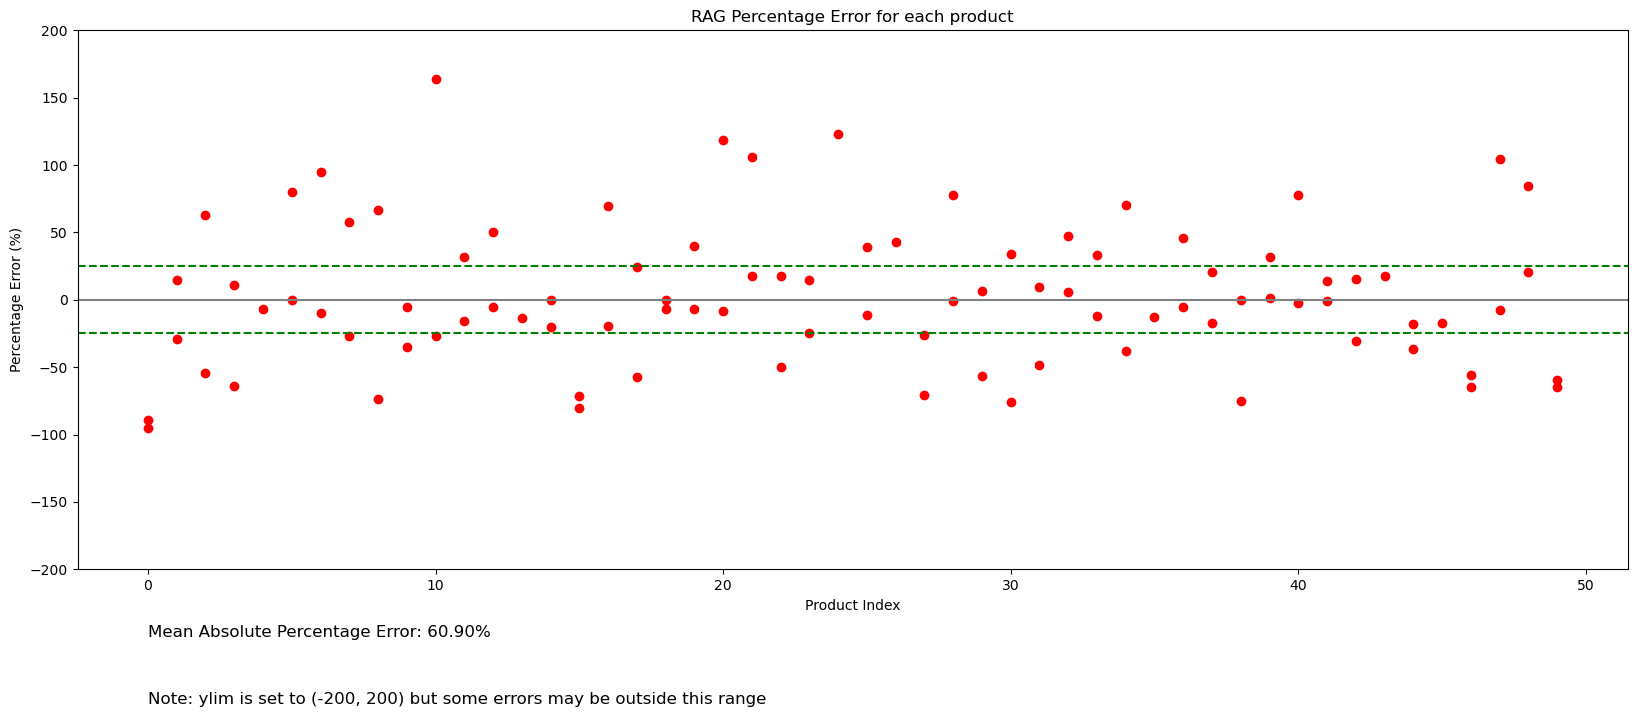

In [14]:
plot_percentage_error(rag_dataset, "RAG Percentage Error for each product")

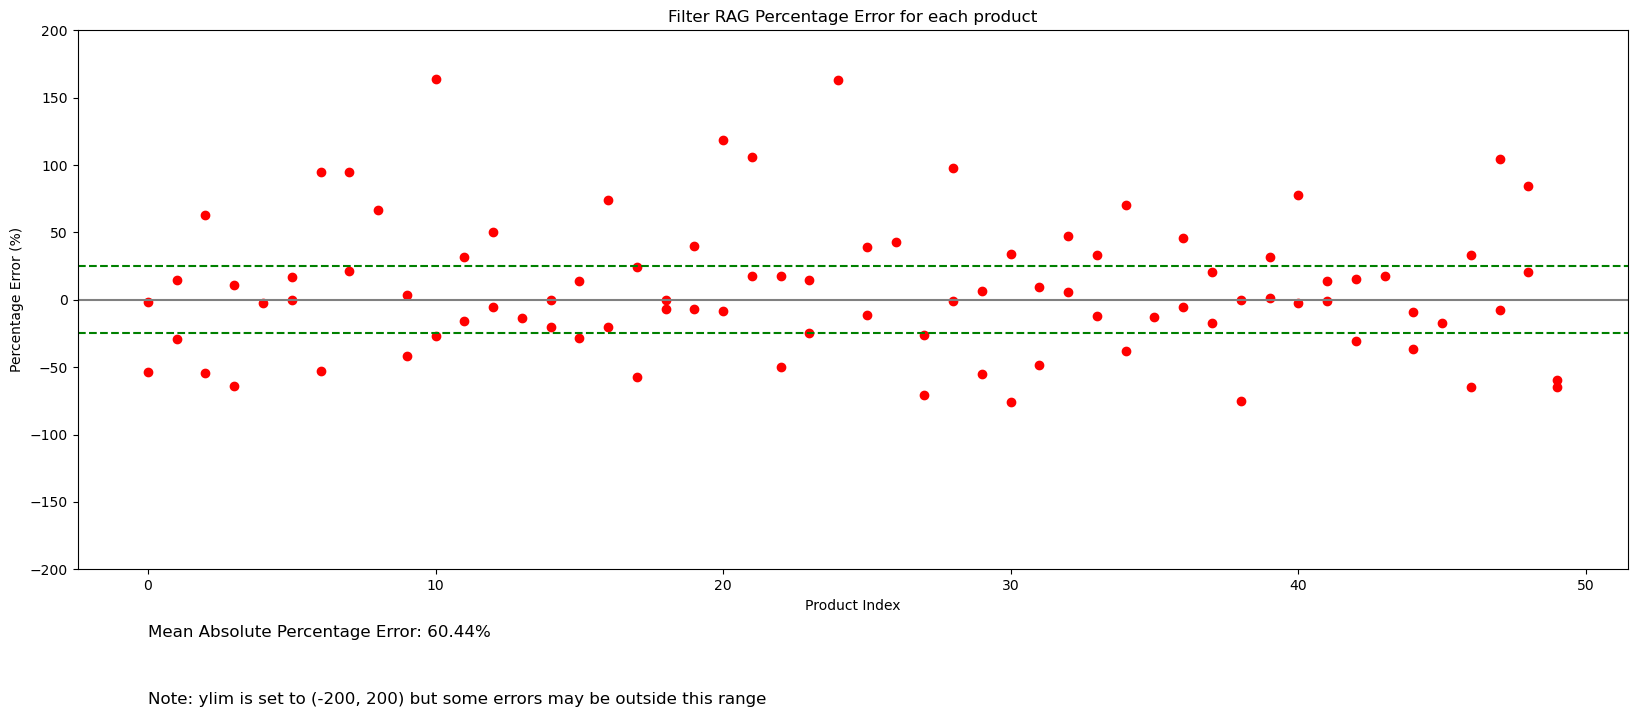

In [16]:
plot_percentage_error(filter_rag_dataset, "Filter RAG Percentage Error for each product")